In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
# Load dataset
data = pd.read_csv("Mall_Customers.csv")

In [16]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
# Select features for clustering
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

In [18]:
# Step 1: Elbow Method
inertia = [] 
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

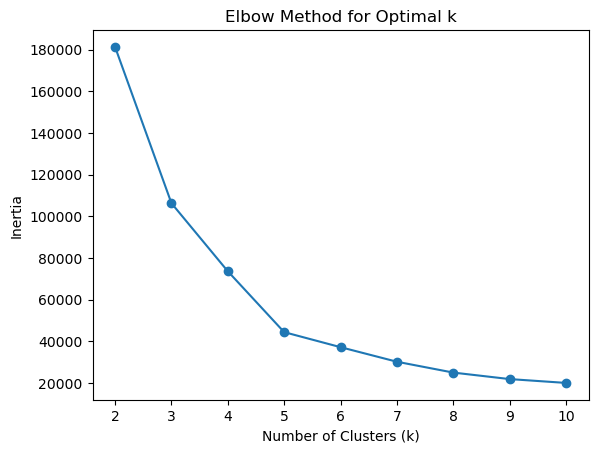

In [19]:
# Plot Elbow curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [20]:
# Step 2: Fit KMeans (choose k=5 here based on elbow method)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

In [21]:
# Add cluster labels to dataset
data["Cluster"] = labels

In [22]:
# Step 3: Silhouette Score

In [23]:
sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.553931997444648


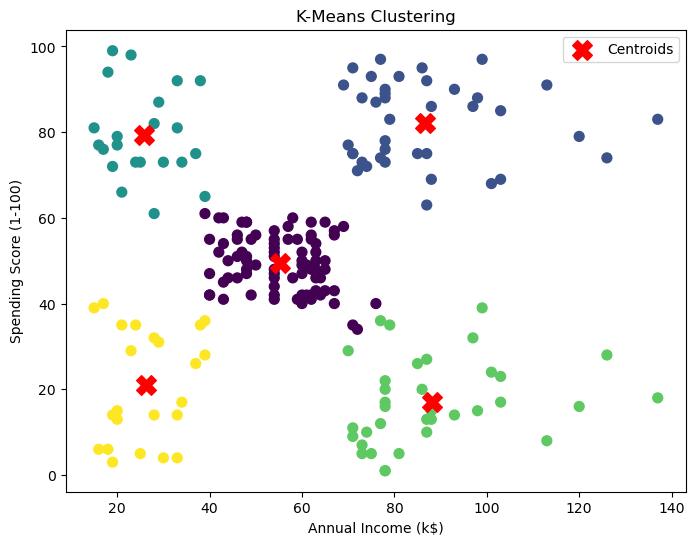

In [24]:
# Step 4: Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], 
            c=labels, cmap="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering")
plt.legend()
plt.show()